In [4]:
import numpy as np
import scipy.special as spsc
import scipy.stats as sps
import sklearn.model_selection as skms
import sklearn.cluster as skc
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

# for plotting in notebooks
%matplotlib inline

# set random seed for reproducibility
np.random.seed(7)

# T10 Classifcation and clustering

## Homework - k means

In today's homwork, we will use k-means to cluster neural responses to visual stimuli. We will again work with simulated data. 

This time, we are interested in seeing whether our hypothetical neural population has uniformely distributed preferred orientations, or whether the preferred directions cluster around certain values (e.g., there might be more neurons responding for 0 or 90 degree orientations than for 45 or 135 degrees).

We'll apply k-means to the tuning curves.

## 1 - Simulate V1 responses

### Properties of simulated neurons

We will assume that most neurons prefer $0$ or $\pi/2$ (corresponding to 0 or 90 degree). We simulate two populations with noisy preferred direction values.

In [5]:
n_neurons = 100

# Each neuron prefers a random direction between 0 and pi
preferred_directions = np.concatenate([np.random.randn(int(n_neurons/2))/10, 
                                       np.random.randn(int(n_neurons/2))/10 + np.pi/2])

### Properties of simulated stimuli

In [6]:
n_stimuli = 200

# Define stimuli: In each of 200 trials, a different random orientation is presented
stimuli = np.random.uniform(0, 1, n_stimuli) * np.pi

### Simulate neural responses

In [7]:
# probability density of the van Mises distribution
# This function is used to model the circular tuning curve

def noisy_vmdist(x, mu, noiselevel):
    
    kappa = 3.65  # concentration parameter kappa determines the width of the tuning curves
    
    pdf = (1 / (np.pi * spsc.i0(kappa))) * np.exp(kappa * np.cos(2 * (x - mu)))

    noise = np.random.rand(len(x)) * noiselevel
    
    return pdf + noise

In [8]:
# Create firing rates as a function of presented orientations

# YOUR CODE HERE 

# Use the Von Mises distribution function defined above

# YOUR CODE HERE

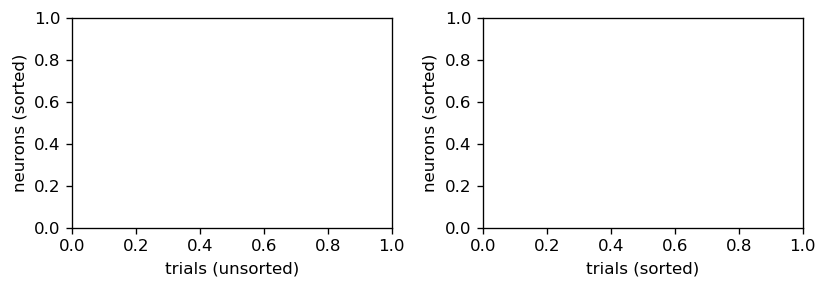

In [10]:
# index that sorts neurons by preferred, and stimuli by presented orientation

# YOUR CODE HERE


# plot V1 responses in different trials, sorted by preferred orientation and stimulus value
plt.figure(figsize=(7,2.5), dpi=120)
plt.subplot(1,2,1)

# YOUR CODE HERE

plt.ylabel('neurons (sorted)')
plt.xlabel('trials (unsorted)')
# plt.colorbar(label='firing rate (Hz)')
plt.subplot(1,2,2)

# YOUR CODE HERE

plt.ylabel('neurons (sorted)')
plt.xlabel('trials (sorted)')
# plt.colorbar(label='firing rate (Hz)')
plt.tight_layout()

In [11]:
# calculate tuning curves

# UNCOMMENT THE CODE BELOW TO CALCULATE TUNING CURVES. SHOULD HAVE SHAPE [n_neurons X 8]

# tuning_curves = np.array([sps.binned_statistic(stimuli, fr, statistic='mean', bins=8)[0] 
#                           for fr in V1_rates])

# print(tuning_curves.shape)

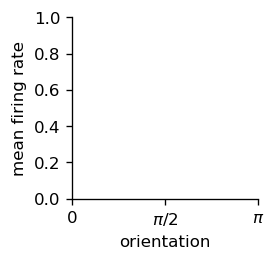

In [12]:
plt.figure(figsize=(2,2), dpi=120)
# plt.plot(tuning_curves[:50].T, 'darkred', alpha=.2) # population 1
# plt.plot(tuning_curves[50:].T, 'lightblue', alpha=.2) # population 2
plt.xticks([0,4,8], ['0', r'$\pi/2$', r'$\pi$'])
plt.xlabel('orientation')
plt.ylabel('mean firing rate')
sns.despine()

## 2 - Cluster neurons with k-means

We will now cluster neurons based on their tuning curves. Note that we calculated tuning curves by averaging firing rates for each of 8 bins. This means that the space that we cluster in is 8-dimensional. Since we have 50 neurons, our dataset has 8 features (the bins) and 100 samples (the neurons) (which we simulated from 2 underlying distributions or clusters).

Note that this is the opposite situation as the one in the tutorial: There, our neurons were the features, and different trials were the samples. Our goal was to classify trials based on values in the neuron-dimensional space. Instead, here we want to cluster neurons into groups. 

### Cluster with correct number of clusters

Use `sklearn.cluster.KMeans` by calling `kmeans = skc.Kmeans(n_clusters = ...)` to initialize a k-means model. Train it by calling the fitting method on the tuning curves, and get the cluster labels with the predict function (check the documentation).

In [13]:
# create model instance

# YOUR CODE HERE

# fit the model 

# YOUR CODE HERE

# predict labels and check which neurons are assigned to which cluster

# YOUR CODE HERE

Extract and plot the cluster means. What do cluster means correspond to?

In [16]:
plt.figure(figsize=(2,2), dpi=120)

# YOUR CODE HERE


<Figure size 240x240 with 0 Axes>

<Figure size 240x240 with 0 Axes>

Your answer here.

### Hyperparameter selection with Silhouette analysis

Repeat the analysis for different cluster sizes k. For each k, print the silhouette score. Which is the best number of clusters?

In [17]:
# repeat over different k and print Silhouette score


We will now simulate neurons from 4 subpopulations, corresponding to neurons that prefer 0, 45, 90, and 135 degree. Then, we will repeat the Silhouette analysis.

In [18]:
n_neurons = 100

# Each neuron prefers a random direction between 0 and pi
preferred_directions = np.concatenate([np.random.randn(int(n_neurons/4))/10, 
                                       np.random.randn(int(n_neurons/4))/10 + np.pi/4,
                                       np.random.randn(int(n_neurons/4))/10 + np.pi/2,
                                       np.random.randn(int(n_neurons/4))/10 + 3*np.pi/4])

# Create firing rates as a function of presented orientations
noiselevel = 1

# Use the Von Mises distribution function defined above

# YOUR CODE HERE

# calculate tuning curves

# UNCOMMENT CODE BELOW TO CALCULATE TUNING CURVES

# tuning_curves = np.array([sps.binned_statistic(stimuli, fr, statistic='mean', bins=8)[0] 
#                           for fr in V1_rates])

In [19]:
# repeat Silhouette analysis for different k

# YOUR CODE HERE

We see that for a ground truth of $k = 4$ clusters, the Silhouette analysis recovers the correct hyperparameter k. 
You could now check whether the ability to recover 4 clusters depends on the level of noise in the firing rates. When you set the noise level to 10, can k means still distinguish 4 clusters?

Throughout the tutorial and homework, you have learned how to implement classifiers and clustering analysis. Moreover, you have seen how simulated data can be used to validate our methods: Knowing the "ground truth", can we get back the true values by applying some type of analysis? How noisy can our data be before we are unable to get back to these true parameters? In statistics, this type of validation is called "parameter recovery".

## The end